In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

**drop unnamed column**

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


**GENDER DISTRIBUTION**

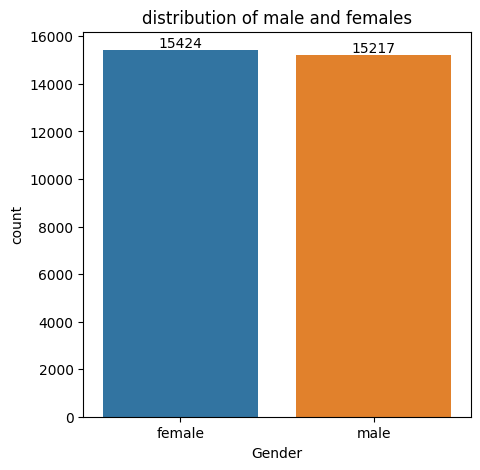

In [43]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df,x='Gender',hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("distribution of male and females")
plt.show()

**#from above chart concluded that female students are more than male students** 

In [19]:
gb = df.groupby('ParentEduc')[['MathScore','ReadingScore','WritingScore']].mean()
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


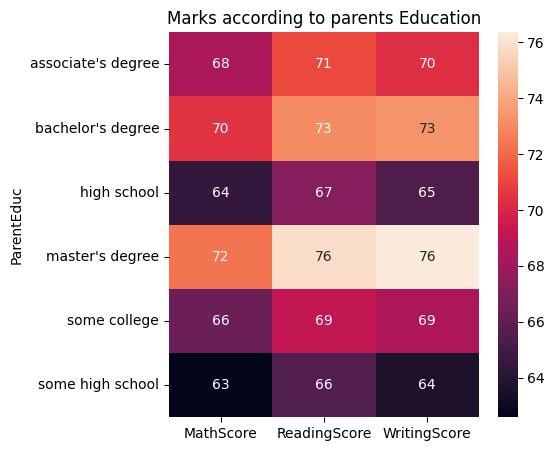

In [44]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.title("Marks according to parents Education")
plt.show()

**from the above chart concluded that parent education is strongly impacting student score**

In [22]:
gb1 = df.groupby('ParentMaritalStatus')[['MathScore','ReadingScore','WritingScore']].mean()
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


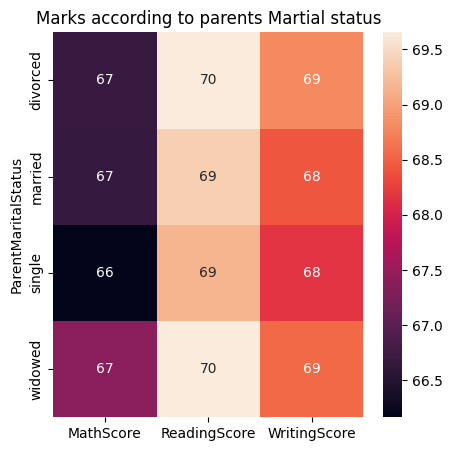

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Marks according to parents Martial status")
plt.show()

**from the above chart concluded that parent martial status have no/negligible impact on student score**

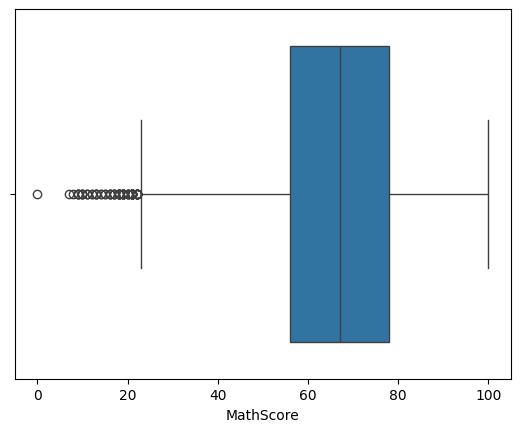

In [25]:
sns.boxplot(data=df,x='MathScore')
plt.show()

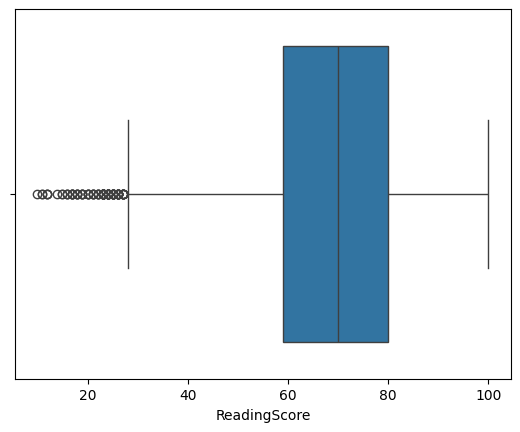

In [26]:
sns.boxplot(data=df,x='ReadingScore')
plt.show()

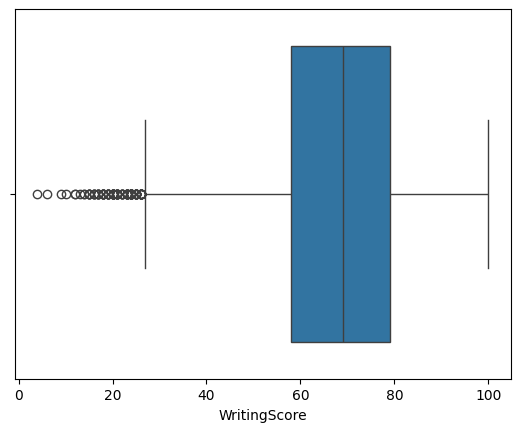

In [27]:
sns.boxplot(data=df,x='WritingScore')
plt.show()

In [28]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

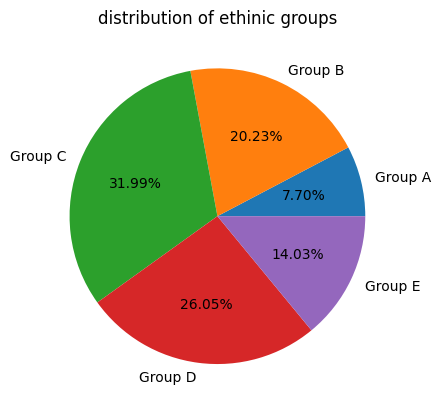

In [41]:
GroupA = df.loc[df['EthnicGroup']=='group A'].count()
GroupB = df.loc[df['EthnicGroup']=='group B'].count()
GroupC = df.loc[df['EthnicGroup']=='group C'].count()
GroupD = df.loc[df['EthnicGroup']=='group D'].count()
GroupE = df.loc[df['EthnicGroup']=='group E'].count()

lab = ['Group A','Group B','Group C','Group D','Group E']
l = [GroupA['EthnicGroup'],GroupB['EthnicGroup'],GroupC['EthnicGroup'],GroupD['EthnicGroup'],GroupE['EthnicGroup']]
plt.pie(l,labels=lab,autopct="%1.2f%%")
plt.title('distribution of ethinic groups')
plt.show()


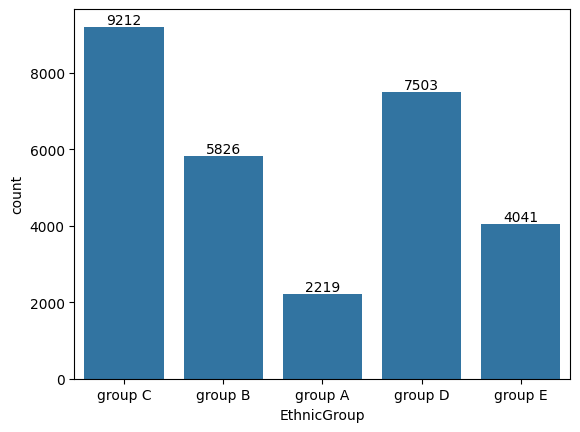

In [47]:
ax=sns.countplot(x='EthnicGroup',data=df)
ax.bar_label(ax.containers[0])
plt.show()